## Machine Learning Project - Early Stage Diabetes Risk Prediction

Source: https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset

### Import Relevant Packages for the Project

In [556]:
# Load EDA Packages
import pandas as pd
import numpy as np

# Load Data Viz Packages
import matplotlib.pyplot as plt
import seaborn as sns

# Load Machine Learning Packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Load Cross Validation Packages
from sklearn.model_selection import cross_val_score

# Load library for feature engineering
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import ExtraTreesClassifier

# Load Model Performance Metrics Calculation Packages
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay


#### Descriptive Analysis of Dataset

In [557]:
# Read the dataset
df = pd.read_csv("data/diabetes_data_upload.csv")

In [558]:
# Dataset Preview
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [559]:
# Check the shape of dataset
df.shape

(520, 17)

In [560]:
# Check columns
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [561]:
# Check Datatypes
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [562]:
# Check for Missing Values
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

### Data Preprocessing

#### Rename Column Name to Lower Case and Replace Spaces with Underscore

In [563]:
# Convert column names to lower case and replace spaces with underscore
df.columns = df.columns.str.lower().str.replace(" ", "_")

df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

#### Label Encoding

In [564]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [565]:
# Create a list of columns to encode (Exclude age, gender, and class)
col_to_label_encode = [col for col in df.columns if col not in ['age', 'gender', 'class']]

col_to_label_encode

['polyuria',
 'polydipsia',
 'sudden_weight_loss',
 'weakness',
 'polyphagia',
 'genital_thrush',
 'visual_blurring',
 'itching',
 'irritability',
 'delayed_healing',
 'partial_paresis',
 'muscle_stiffness',
 'alopecia',
 'obesity']

In [566]:
# Create LabelEncoder instance
LE = LabelEncoder()

In [567]:
# Encode `col_to_label_encode`
for col in col_to_label_encode:
    df[col] = LE.fit_transform(df[col].astype(str))

In [568]:
# Inspect the changes
df.dtypes

age                    int64
gender                object
polyuria               int32
polydipsia             int32
sudden_weight_loss     int32
weakness               int32
polyphagia             int32
genital_thrush         int32
visual_blurring        int32
itching                int32
irritability           int32
delayed_healing        int32
partial_paresis        int32
muscle_stiffness       int32
alopecia               int32
obesity                int32
class                 object
dtype: object

In [569]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [570]:
# How to check the initial class (Before Label Encoding)
print(LE.classes_)

['No' 'Yes']


In [571]:
# Encode for gender and class columns
gender_map = {"Female":0, "Male":1}
target_map = {"Negative":0, "Positive":1}

In [572]:
# Map the dictionary mapping to the columns
df['gender'] = df['gender'].map(gender_map)
df['class'] = df['class'].map(target_map)

df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [573]:
# Recheck Datatypes
df.dtypes

age                   int64
gender                int64
polyuria              int32
polydipsia            int32
sudden_weight_loss    int32
weakness              int32
polyphagia            int32
genital_thrush        int32
visual_blurring       int32
itching               int32
irritability          int32
delayed_healing       int32
partial_paresis       int32
muscle_stiffness      int32
alopecia              int32
obesity               int32
class                 int64
dtype: object

In [574]:
# Recheck using Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 520 non-null    int64
 1   gender              520 non-null    int64
 2   polyuria            520 non-null    int32
 3   polydipsia          520 non-null    int32
 4   sudden_weight_loss  520 non-null    int32
 5   weakness            520 non-null    int32
 6   polyphagia          520 non-null    int32
 7   genital_thrush      520 non-null    int32
 8   visual_blurring     520 non-null    int32
 9   itching             520 non-null    int32
 10  irritability        520 non-null    int32
 11  delayed_healing     520 non-null    int32
 12  partial_paresis     520 non-null    int32
 13  muscle_stiffness    520 non-null    int32
 14  alopecia            520 non-null    int32
 15  obesity             520 non-null    int32
 16  class               520 non-null    int64
dt

In [575]:
# Descriptive Summary after Data Preprocessing
df.describe()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Exploratory Data Analysis (EDA)

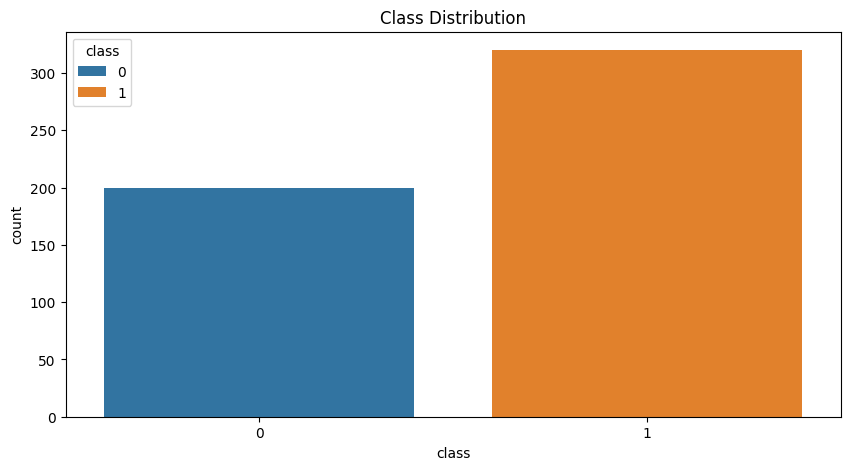

In [576]:
# Plot the distribution of class
plt.figure(figsize=(10, 5))
plt.title("Class Distribution")
sns.countplot(df, x='class', hue='class')
plt.show()

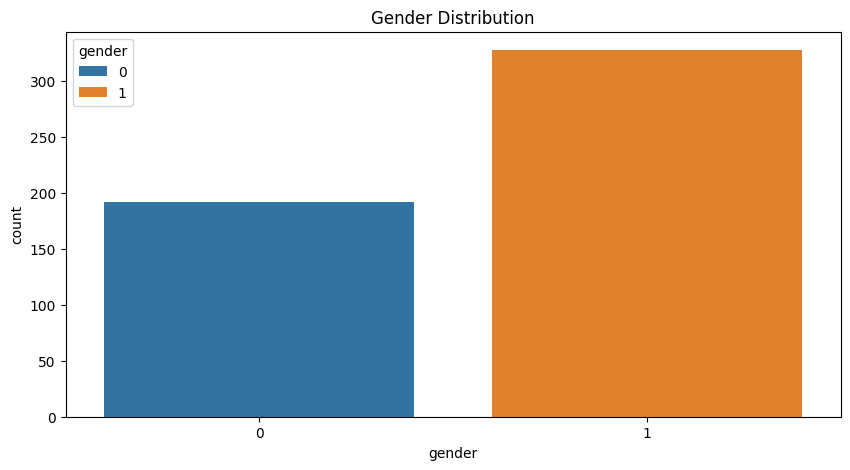

In [577]:
# Plot the distribution of gender
plt.figure(figsize=(10, 5))
plt.title("Gender Distribution")
sns.countplot(df, x='gender', hue='gender')
plt.show()

In [578]:
# Frequency distribution of Age Range
labels = ["Less than 10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80 and more"]
bins = [i for i in range(0, 100, 10)]

print(bins)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


In [579]:
freq_df = df.groupby(pd.cut(df['age'], bins=bins, labels=labels)).size()

freq_df.head()

C:\Users\WeiZhenLim\AppData\Local\Temp\ipykernel_33772\2299624460.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_df = df.groupby(pd.cut(df['age'], bins=bins, labels=labels)).size()


age
Less than 10      0
10-20             1
20-30            44
30-40           123
40-50           145
dtype: int64

In [580]:
freq_df = freq_df.reset_index(name='count')

freq_df.head()

,age,count
0,Less than 10,0
1,10-20,1
2,20-30,44
3,30-40,123
4,40-50,145


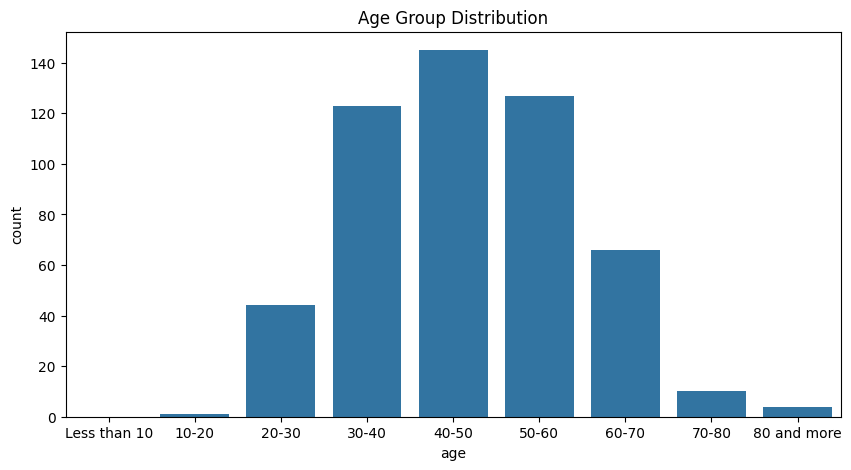

In [581]:
# Plot Age Group Distribution
plt.figure(figsize=(10, 5))
plt.title("Age Group Distribution")
sns.barplot(freq_df, x='age', y='count')
plt.show()

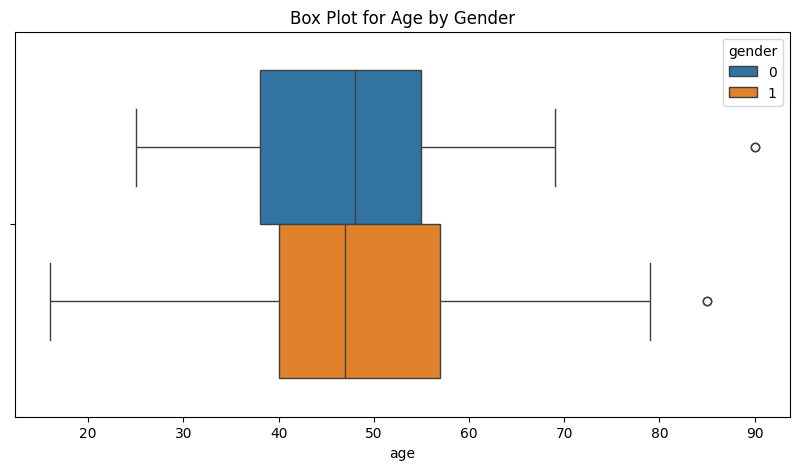

In [582]:
# Check whether there's any outliers found in age
plt.figure(figsize=(10, 5))
plt.title("Box Plot for Age by Gender")
sns.boxplot(df, x='age', hue='gender')
plt.show()

### Correlation Analysis of Features

In [583]:
# Create a correlation matrix
corr_matrix = df.corr()
corr_matrix.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden_weight_loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568


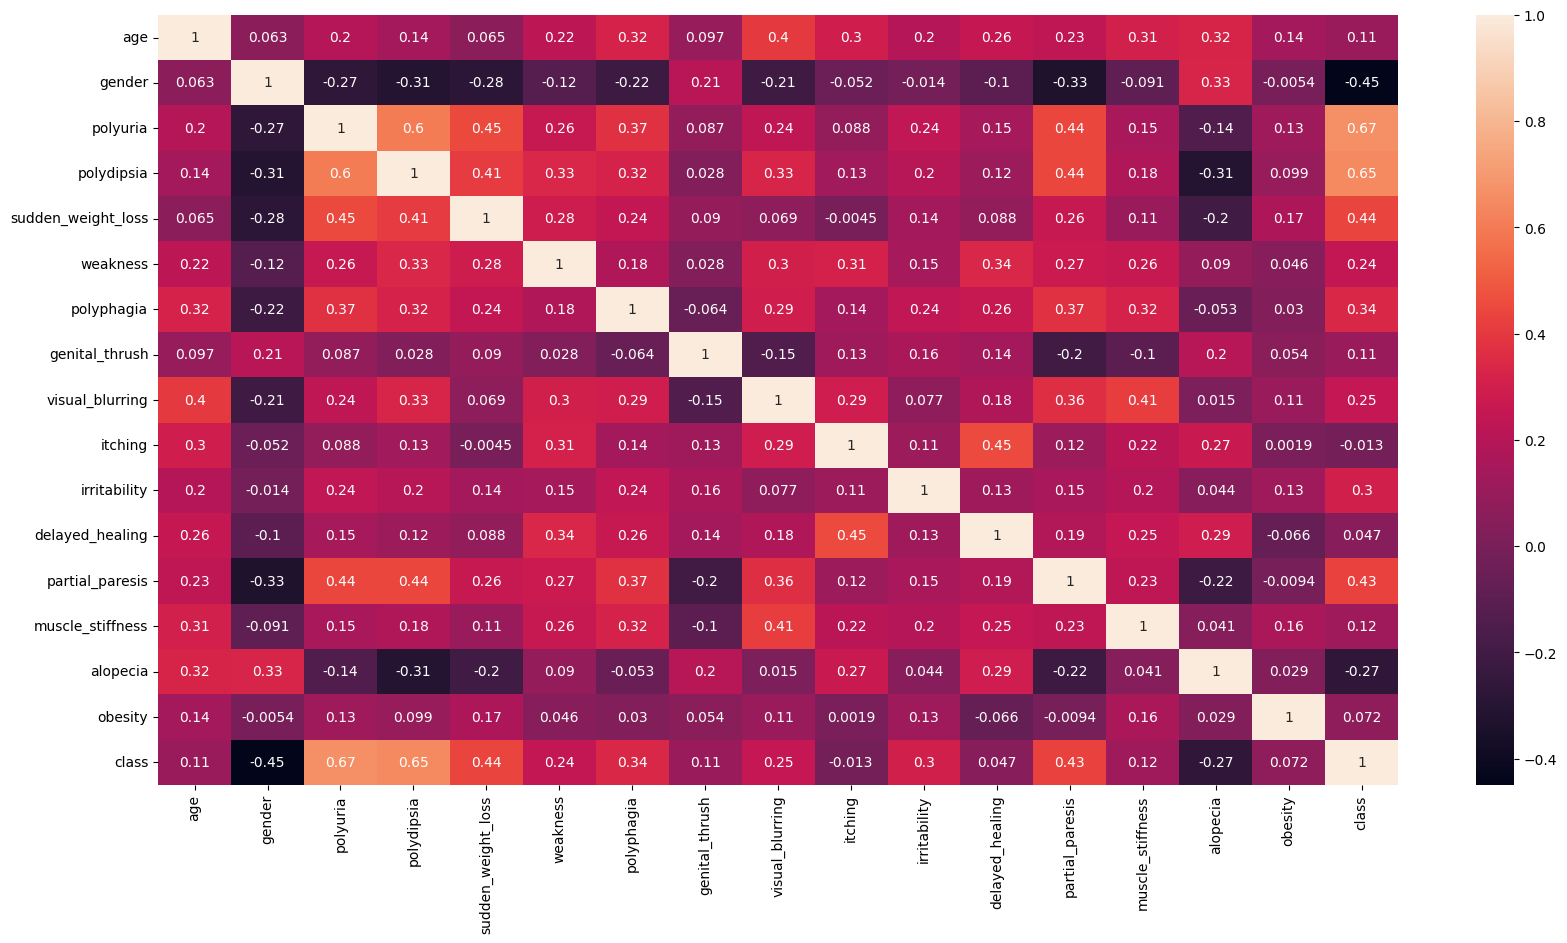

In [584]:
# Plot Correlation with Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

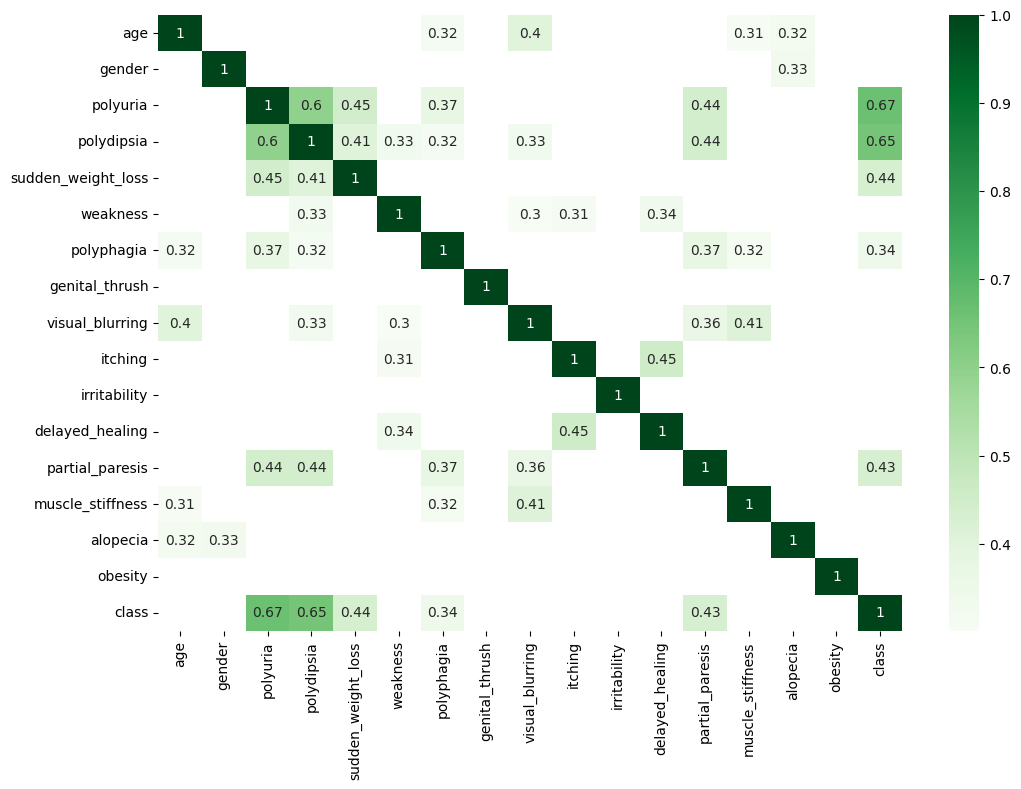

In [585]:
# Plot Correlation Matrix with certain threshold
highest_corr = corr_matrix[corr_matrix>=0.3]
plt.figure(figsize=(12,8))
sns.heatmap(highest_corr, annot=True, cmap='Greens')
plt.show()

In [586]:
# Get the list of features with the highest correction coefficient
s = corr_matrix.abs().unstack()
top_feats_per_corr = s.sort_values(kind='quicksort')

print(top_feats_per_corr)

obesity             itching               0.001894
itching             obesity               0.001894
                    sudden_weight_loss    0.004516
sudden_weight_loss  itching               0.004516
obesity             gender                0.005396
                                            ...   
polydipsia          polydipsia            1.000000
polyuria            polyuria              1.000000
gender              gender                1.000000
obesity             obesity               1.000000
class               class                 1.000000
Length: 289, dtype: float64


### Feature Engineering

#### Method 1: `sklearn.feature_selection.SelectKBest`

In [587]:
# Split the dataset into input variable (X) and target variable (y)
X = df.drop('class', axis=1)
print(X.columns)

y = df['class']

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity'],
      dtype='object')


In [588]:
# Find the best features using SelectKBest
skb = SelectKBest(score_func=chi2, k=10)
best_feature_fit = skb.fit(X, y)

In [589]:
# Mapping to Feature Name
feature_scores = pd.DataFrame(best_feature_fit.scores_, columns=['feature_scores'])

In [590]:
feature_column_names = pd.DataFrame(X.columns, columns=['feature_name'])
best_feat_df = pd.concat([feature_scores, feature_column_names], axis=1)

best_feat_df

,feature_scores,feature_name
0,18.845767,age
1,38.747637,gender
2,116.184593,polyuria
3,120.785515,polydipsia
4,57.749309,sudden_weight_loss
5,12.724262,weakness
6,33.198418,polyphagia
7,4.914009,genital_thrush
8,18.124571,visual_blurring
9,0.047826,itching


In [591]:
# Get the top 10 features 
best_feat_df.nlargest(10, 'feature_scores')

,feature_scores,feature_name
3,120.785515,polydipsia
2,116.184593,polyuria
4,57.749309,sudden_weight_loss
12,55.314286,partial_paresis
1,38.747637,gender
10,35.334127,irritability
6,33.198418,polyphagia
14,24.402793,alopecia
0,18.845767,age
8,18.124571,visual_blurring


#### Method 2: `sklearn.ensemble.ExtraTreesClassifier`

In [592]:
et_clf = ExtraTreesClassifier()
et_clf.fit(X,y)

ExtraTreesClassifier()

In [593]:
print(et_clf.feature_importances_)

[0.04656853 0.10960171 0.20695499 0.21626017 0.06083449 0.02126494
 0.02937443 0.0248615  0.03441542 0.0334672  0.04351899 0.04159134
 0.04449672 0.02904594 0.03932084 0.0184228 ]


In [594]:
# Convert et_clf to a DataFrame
feat_imp_df = pd.Series(et_clf.feature_importances_, index=X.columns)

<Axes: >

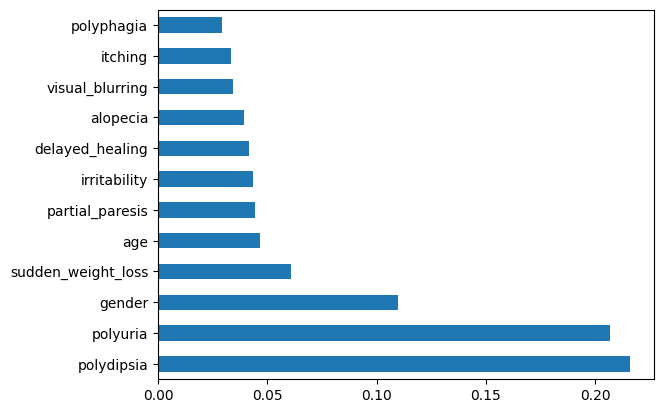

In [595]:
# Check the top 12 features
feat_imp_df.nlargest(12).plot(kind='barh')

### Machine Learning Model Development

In [596]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [597]:
print(X_train, X_test)

     age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
225   29       1         0           0                   0         1   
94    36       0         1           1                   0         1   
462   57       1         0           0                   0         0   
284   72       1         1           0                   0         0   
23    48       1         0           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
71    35       0         0           1                   1         1   
106   58       1         0           1                   1         1   
270   40       0         1           1                   1         1   
435   57       1         1           1                   1         1   
102   90       0         0           1                   1         0   

     polyphagia  genital_thrush  visual_blurring  itching  irritability  \
225           0               0                0        0   

In [598]:
# Load StandardScaler & Perform Standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [599]:
print(X_train, X_test)

[[-1.54877215  0.75429803 -0.97289468 ... -0.80439967 -0.75429803
  -0.41736501]
 [-0.97932461 -1.32573593  1.02786048 ... -0.80439967 -0.75429803
  -0.41736501]
 [ 0.729018    0.75429803 -0.97289468 ...  1.24316312 -0.75429803
  -0.41736501]
 ...
 [-0.65392602 -1.32573593  1.02786048 ...  1.24316312 -0.75429803
  -0.41736501]
 [ 0.729018    0.75429803  1.02786048 ... -0.80439967 -0.75429803
  -0.41736501]
 [ 3.41355641 -1.32573593 -0.97289468 ...  1.24316312  1.32573593
  -0.41736501]] [[ 1.94926273  0.75429803  1.02786048 ...  1.24316312  1.32573593
  -0.41736501]
 [-0.65392602 -1.32573593  1.02786048 ... -0.80439967 -0.75429803
  -0.41736501]
 [ 0.729018    0.75429803  1.02786048 ... -0.80439967 -0.75429803
  -0.41736501]
 ...
 [-1.46742251  0.75429803 -0.97289468 ... -0.80439967 -0.75429803
  -0.41736501]
 [-1.46742251 -1.32573593  1.02786048 ... -0.80439967 -0.75429803
  -0.41736501]
 [-0.08447848  0.75429803 -0.97289468 ... -0.80439967  1.32573593
  -0.41736501]]


#### Logistic Regression Model

In [600]:
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [601]:
# Check model accuracy
y_pred = lr_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9358974358974359


### Model Evaluation

#### Classification Report

In [602]:
target_names = ["Negative(0)", "Positive(1)"]

In [603]:
# Classification Report
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.91      0.91      0.91        54
 Positive(1)       0.95      0.95      0.95       102

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156



#### Confusion Matrix

In [604]:
confusion_matrix(y_test, y_pred)

array([[49,  5],
       [ 5, 97]], dtype=int64)

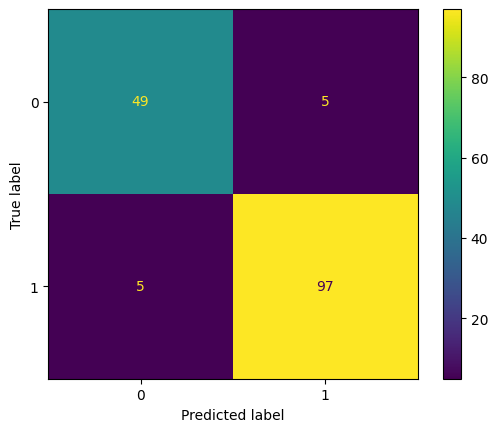

In [605]:
# Plot Confusion Matrix (Method 1: Plot Using the Predicted Results)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

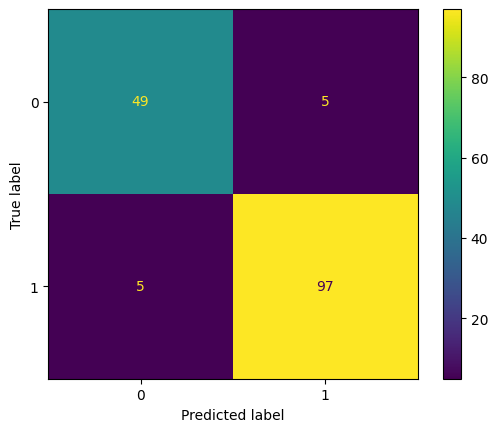

In [606]:
# Plot Confusion Matrix (Method 2: Plot Using the Estimator)
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test)
plt.show()

#### ROC Curve

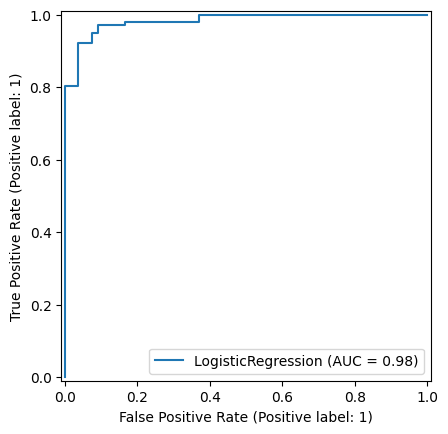

In [607]:
# Method 1: Plot ROC Curve with Estimator
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)
plt.show()

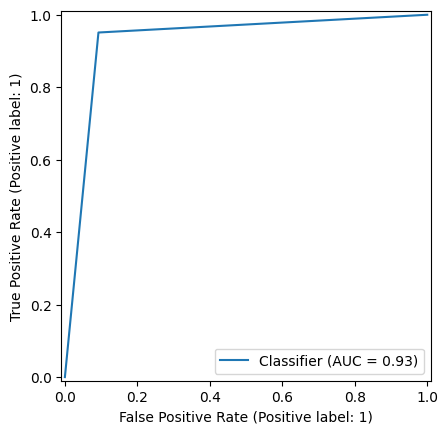

In [608]:
# Method 2: Plot ROC Curve with Predictions
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

### Cross Validation

In [609]:
def cross_validate_model(model_estimator, X, y, cv):
    scores = cross_val_score(model_estimator, X, y, scoring='accuracy', cv=cv)
    result = f"Mean Accuracy {np.mean(scores)} Standard Deviation {np.std(scores)}"
    return result

In [610]:
# Cross Validation for LR model
cv_scores_lr_model = cross_validate_model(lr_model, X, y, 5)

print(cv_scores_lr_model)

Mean Accuracy 0.926923076923077 Standard Deviation 0.036284542815602304


### Saving Model

In [611]:
# Import Joblib
import joblib

In [612]:
# Save LR Model
model_file = open("models/logistic_regression_model_diabetes.pkl", "wb")
joblib.dump(lr_model, model_file)
model_file.close()